In [79]:
import pandas as pd
import numpy as np

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume(Currency)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-15'):
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-15/{filename}', index_col=False)])
    print(filename)

2020-07-27.csv
2020-07-28.csv
2020-07-29.csv


In [80]:
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

# Visualization

In [81]:
data['Volume(Currency)'].max()

17027846.242286444

count     291.000000
mean      103.855848
std       184.046934
min         0.798324
25%        29.662228
50%        57.980533
75%       100.039328
max      1697.867066
Name: Volume(BTC), dtype: float64

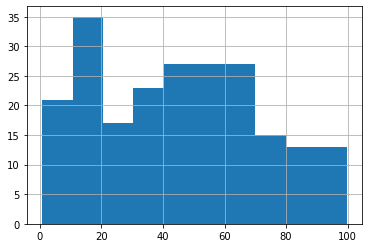

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

data[data['Volume(BTC)'] < 100]['Volume(BTC)'].hist()
data['Volume(BTC)'].describe()

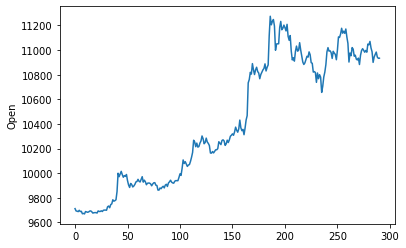

In [83]:
sns.lineplot(x=range(len(data)), y='Open', data=data)

In [91]:
corr_matrix = data.corr()
corr_matrix['PerChange'].sort_values(ascending=False)

PerChange           1.000000
Change              0.999351
Open                0.050313
Low                 0.003360
WeightedPrice      -0.012284
High               -0.013963
Close              -0.039502
Volume(Currency)   -0.200195
Volume(BTC)        -0.207021
Name: PerChange, dtype: float64

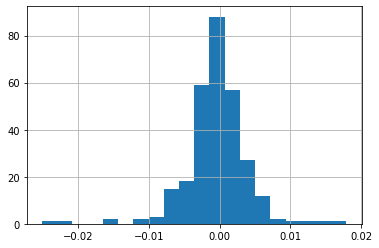

In [87]:
data['PerChange'].hist(bins=20)

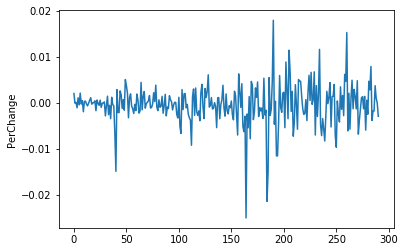

In [94]:
sns.lineplot(x=range(len(data)), y='PerChange', data=data)

# 1st training run: Nueral Network LSTM

In [165]:
from sklearn.preprocessing import MinMaxScaler

TEST_SIZE = 0.2

X = data.drop(['Volume(Currency)', 'Change', 'PerChange'], axis=1)
y = data['PerChange']

X_s = MinMaxScaler().fit_transform(X)

ti = len(X_s) - int(len(X_s) * TEST_SIZE)

X_train, X_test, y_train, y_test = X_s[:ti], X_s[ti:], y[:ti], y[ti:]

X_train = X_train.reshape(-1, 1, 7)
X_test = X_test.reshape(-1, 1, 7)

# CUT HERE

In [196]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)


def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Create a specified number of hidden layers for an RNN
    Optional: Adds regularization option, dropout layer to prevent potential overfitting if necessary
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

In [292]:
from sklearn.preprocessing import MinMaxScaler

change = MinMaxScaler().fit_transform([[p] for p in np.array(data['PerChange'])])

IN = 100
OUT = 1
FEATURES = 1

X, y = split_sequence(change, IN, OUT)


In [293]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(IN, FEATURES)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [294]:
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.3588
Epoch 2/100
6/6 - 0s - loss: 0.2913
Epoch 3/100
6/6 - 0s - loss: 0.2206
Epoch 4/100
6/6 - 0s - loss: 0.1431
Epoch 5/100
6/6 - 0s - loss: 0.0486
Epoch 6/100
6/6 - 0s - loss: 0.0265
Epoch 7/100
6/6 - 0s - loss: 0.0197
Epoch 8/100
6/6 - 0s - loss: 0.0185
Epoch 9/100
6/6 - 0s - loss: 0.0151
Epoch 10/100
6/6 - 0s - loss: 0.0156
Epoch 11/100
6/6 - 0s - loss: 0.0146
Epoch 12/100
6/6 - 0s - loss: 0.0148
Epoch 13/100
6/6 - 0s - loss: 0.0147
Epoch 14/100
6/6 - 0s - loss: 0.0146
Epoch 15/100
6/6 - 0s - loss: 0.0145
Epoch 16/100
6/6 - 0s - loss: 0.0145
Epoch 17/100
6/6 - 0s - loss: 0.0146
Epoch 18/100
6/6 - 0s - loss: 0.0145
Epoch 19/100
6/6 - 0s - loss: 0.0146
Epoch 20/100
6/6 - 0s - loss: 0.0146
Epoch 21/100
6/6 - 0s - loss: 0.0145
Epoch 22/100
6/6 - 0s - loss: 0.0145
Epoch 23/100
6/6 - 0s - loss: 0.0145
Epoch 24/100
6/6 - 0s - loss: 0.0145
Epoch 25/100
6/6 - 0s - loss: 0.0145
Epoch 26/100
6/6 - 0s - loss: 0.0145
Epoch 27/100
6/6 - 0s - loss: 0.0145
Epoch 28/1

In [295]:
y_pred = model.predict(X)

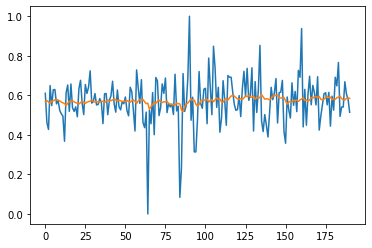

In [298]:
sns.lineplot(x=range(len(y.reshape(1,-1)[0])), y=y.reshape(1,-1)[0], data=data)
sns.lineplot(x=range(len(y_pred.reshape(1,-1)[0])), y=y_pred.reshape(1,-1)[0], data=data)

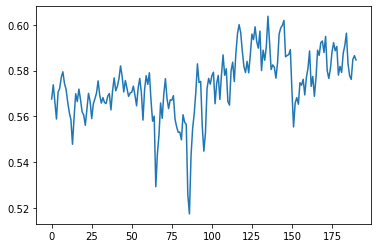

In [297]:
sns.lineplot(x=range(len(y_pred.reshape(1,-1)[0])), y=y_pred.reshape(1,-1)[0], data=data)